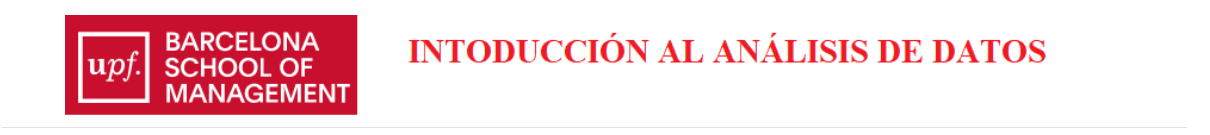

Luz Mary Pinzón S. luzmary.pinzon@upf.edu

# más temporalidad

**El objetivo** de este cuaderno es ver como solucionar un problema que se presenta con los precios y que se refleja en los retornos


### Ejercicio



Descargar todos los datos históricos de JNJJohnson & Johnson (JNJ) y calcular:

1. Retornos diarios del Adjust Close

2. Gráfico de los retornos

3. calcular la rentabilidad acumulada


## Ejercicio

1.Descargar todos los precios de JNJJohnson & Johnson (JNJ)

In [1]:
import yfinance as yf
import pandas as pd
import kit

2. Seleccionar el 'Adj Close'

In [2]:
JNJ = yf.download("JNJ")
JNJ_ad = JNJ[["Adj Close"]]
JNJ_ad.head(3)

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1962-01-02,0.063021
1962-01-03,0.062041
1962-01-04,0.061388


In [3]:
#3.Calcular los rendimientos diarios y quitar los nan's

retorno_JNJ = JNJ_ad.pct_change().dropna()
retorno_JNJ

,Adj Close
Date,
1962-01-03,-0.015548
1962-01-04,-0.010523
1962-01-05,-0.015960
1962-01-08,-0.016216
1962-01-09,0.010991
...,...
2024-10-11,0.005919
2024-10-14,0.000867
2024-10-15,0.015470


In [5]:
# Rentabilidad acumulada- 
kit.ret_acum(JNJ_ad)


El retorno acumulado es: Adj Close    2606.559403
dtype: float64


### 4. Que pasa en 

In [6]:
# en 1962-01-15


In [7]:
# que dia de la semana era 1962-01-15
from datetime import datetime

fecha = datetime(1962, 1, 15)
dia_semana = fecha.strftime("%A")
dia_semana

'Monday'

Mas informacion sobre dia de la semana [Aquí](https://programacionfacil.org/cursos/python_basico/capitulo_46_fechas_python_strftime.html)

In [8]:
# cuantos retorns son ceros 
retorno_JNJ[retorno_JNJ["Adj Close"] == 0].count()


Adj Close    691
dtype: int64

In [11]:
# Elimina todas las filas que contienen ceros, Seleccionamos los diferentes a cero.

retorno_no = retorno_JNJ[retorno_JNJ["Adj Close"] != 0]
retorno_no

,Adj Close
Date,
1962-01-03,-0.015548
1962-01-04,-0.010523
1962-01-05,-0.015960
1962-01-08,-0.016216
1962-01-09,0.010991
...,...
2024-10-11,0.005919
2024-10-14,0.000867
2024-10-15,0.015470


#### Simplificando el calculo para la rentabilidad acumulada

**Precios**

####  simple return  

$R_t= \frac{Pt-P{t-1}}{P{t-1}}$= $\frac{Pt}{P{t-1}}-1$

####  Gross return es:  

$1+R_t=\frac{Pt}{P{t-1}}$

####  Acumulated return  
$R_{ac}=\Pi ^t_1 (1+R_i)-1$

$ R_{ac}=(1+R_1)*(1+R_2)*(1+R_3)*...*(1+R_n)-1$

$ R_{ac}=\frac{P1}{P{0}}*\frac{P2}{P{1}}*\frac{P3}{P{2}}*...*\frac{Pt}{P{t-1}}-1$ 

$ R_{ac}=\frac{Pt}{P{0}}-1$ 

###  Acumulación paso a paso
$$R_{acumulado}=\frac{Precio_{final}}{Precio_{inicial}}-1$$

In [12]:
# Calcular el retorno acumulado paso a paso}

JNJ_ad.head(3)

,Adj Close
Date,
1962-01-02,0.063021
1962-01-03,0.062041
1962-01-04,0.061388


In [13]:
JNJ_ad.tail()

,Adj Close
Date,
2024-10-11,161.460007
2024-10-14,161.600006
2024-10-15,164.100006
2024-10-16,164.279999
2024-10-17,164.330002


In [14]:
JNJ_ad.iloc[0]

Adj Close    0.063021
Name: 1962-01-02 00:00:00, dtype: float64

In [15]:
Retorno_acumulado = JNJ_ad.iloc[-1]/JNJ_ad.iloc[0]-1
Retorno_acumulado

Adj Close    2606.559403
dtype: float64

In [16]:
kit.ret_acum(JNJ_ad)

El retorno acumulado es: Adj Close    2606.559403
dtype: float64
